#  <u>*Auto Mobile Analysis .*</u>

## <u>*Analysis objective*</u>
### *To predict predicy the Auto Mobile Prices based on given features inputs*

---

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')

## *Importing data*

In [42]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## *Data shape*

In [43]:
df.shape

(205, 26)

## *Data info*

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

---

## *Data Cleaning*

*A. colums names cleaning: (converting all to small letters and add "_" in spaces between words)*

In [45]:
import janitor
df=df.clean_names()

*B. Replaing "?" symbol with nan-value :*

In [46]:
df=df.replace("?",np.nan)

*C. na-values :*

In [47]:
print(f"The total number of na values are {df.isna().sum().sum()}")
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na values are 59

The number of na-values in each features are :


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

*-- We will replce the NA Values wuth randomly selcted values for the same dataset*

In [48]:
from feature_engine.imputation import RandomSampleImputer
rand_imput=RandomSampleImputer(seeding_method="add")
rand_imput.fit(df)
rand_imput.transform(df)
df=rand_imput.transform(df)

*D. converting features into desired Data Type:*

In [49]:
df=df.infer_objects()
df[["normalized_losses","horsepower","peak_rpm","price"]]=df[["normalized_losses","horsepower","peak_rpm","price"]].astype("int64")
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float64")

---

## *Exploratory Data Analysis - EDA*

*A. categorical & numerical_features:*

In [50]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [51]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 16 numerical features : ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
we have 10 categorical features : ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


*B. Basic data statistics:*

* *Numerical data statistics :*

In [52]:
pd.DataFrame(numerical_features).describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,121.570732,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.334488,3.256098,10.142537,104.848780,5124.146341,25.219512,30.751220,13212.965854
std,1.245307,35.668285,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.274288,0.314484,3.972040,39.982123,477.549790,6.542142,6.886443,7936.758368
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,113.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


* *Categorical data statistics :*

In [53]:
pd.DataFrame(categorical_features).describe()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


*C. EDA - Data Visualization:*

*Numerical features Visualization :*

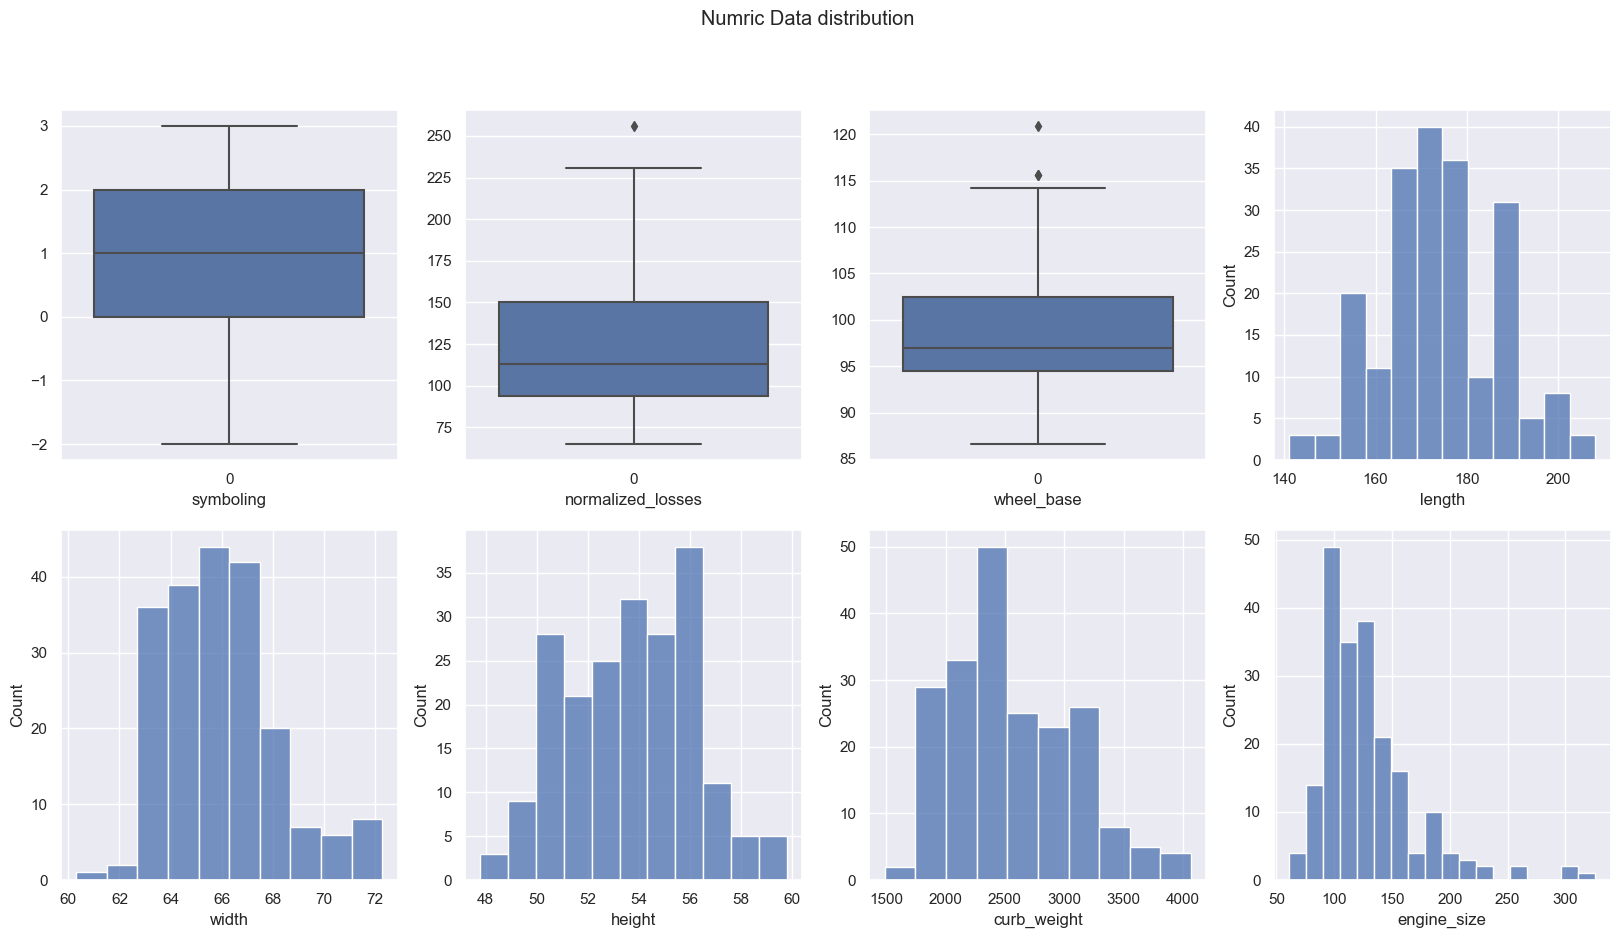

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Numric Data distribution ");

plt.subplot(241)
sns.boxplot(numerical_features["symboling"])
plt.xlabel("symboling");

plt.subplot(242)
sns.boxplot(numerical_features["normalized_losses"])
plt.xlabel("normalized_losses");

plt.subplot(243)
sns.boxplot(numerical_features["wheel_base"])
plt.xlabel("wheel_base");


plt.subplot(244)
sns.histplot(numerical_features["length"])
plt.xlabel("length");

plt.subplot(245)
sns.histplot(numerical_features["width"],bins=10)
plt.xlabel("width");

plt.subplot(246)
sns.histplot(numerical_features["height"])
plt.xlabel("height");

plt.subplot(247)
sns.histplot(numerical_features["curb_weight"])
plt.xlabel("curb_weight");

plt.subplot(248)
sns.histplot(numerical_features["engine_size"])
plt.xlabel("engine_size");



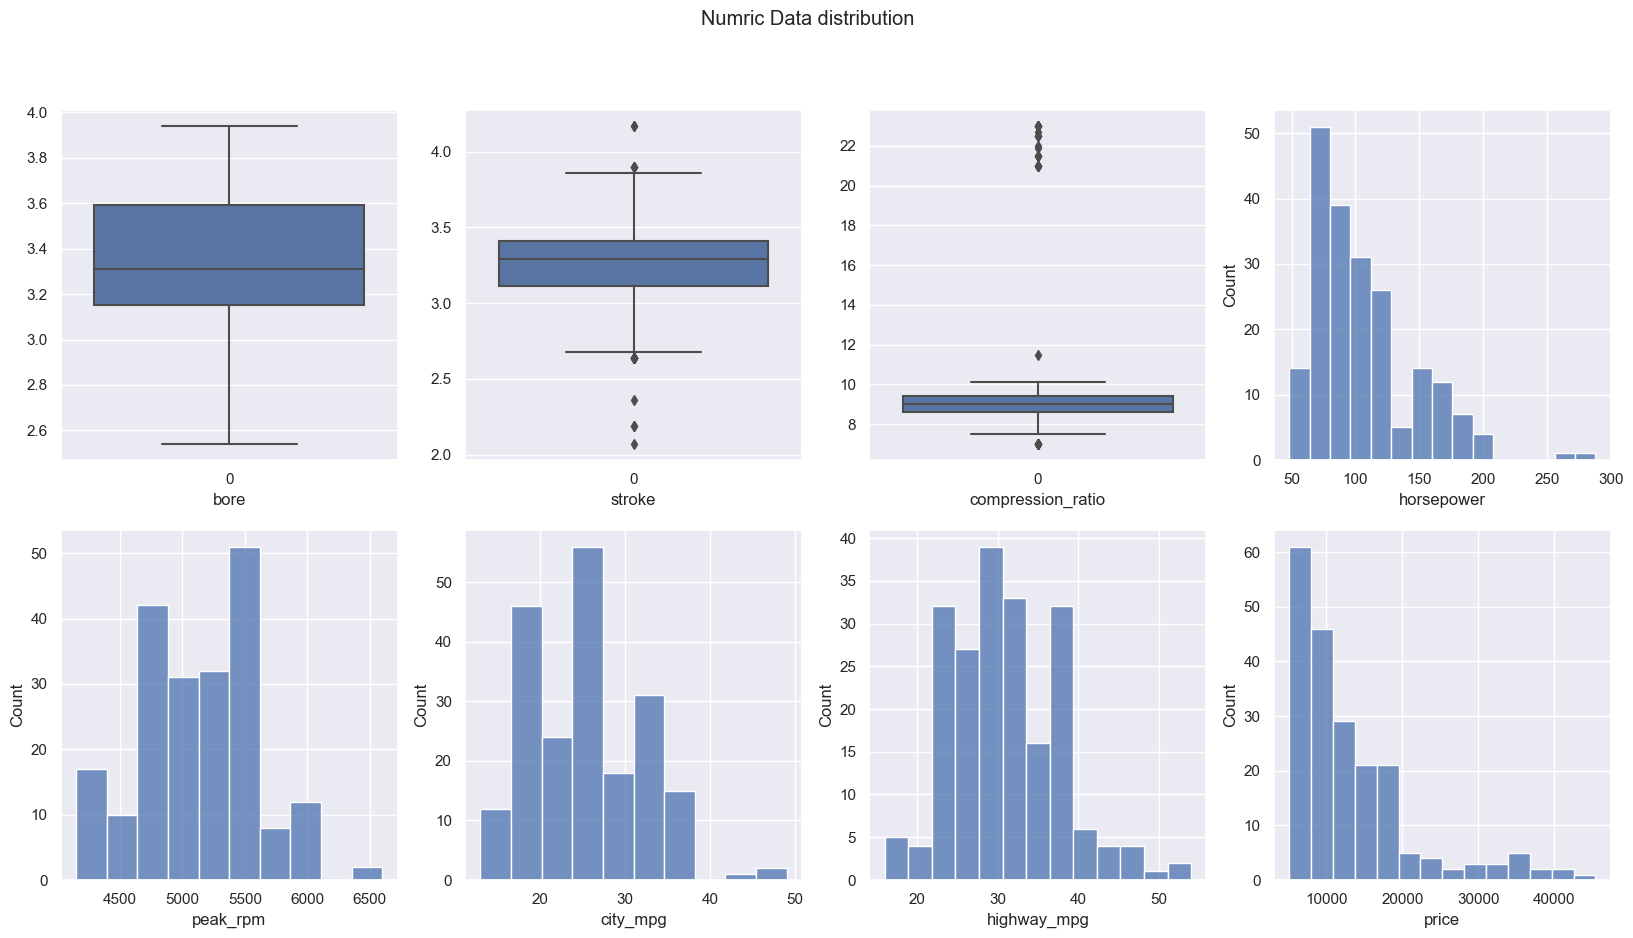

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Numric Data distribution ");

plt.subplot(241)
sns.boxplot(numerical_features["bore"])
plt.xlabel("bore");

plt.subplot(242)
sns.boxplot(numerical_features["stroke"])
plt.xlabel("stroke");

plt.subplot(243)
sns.boxplot(numerical_features["compression_ratio"])
plt.xlabel("compression_ratio");


plt.subplot(244)
sns.histplot(numerical_features["horsepower"])
plt.xlabel("horsepower");

plt.subplot(245)
sns.histplot(numerical_features["peak_rpm"],bins=10)
plt.xlabel("peak_rpm");

plt.subplot(246)
sns.histplot(numerical_features["city_mpg"])
plt.xlabel("city_mpg");

plt.subplot(247)
sns.histplot(numerical_features["highway_mpg"])
plt.xlabel("highway_mpg");

plt.subplot(248)
sns.histplot(numerical_features["price"])
plt.xlabel("price");


*Categorical features Visualization :*

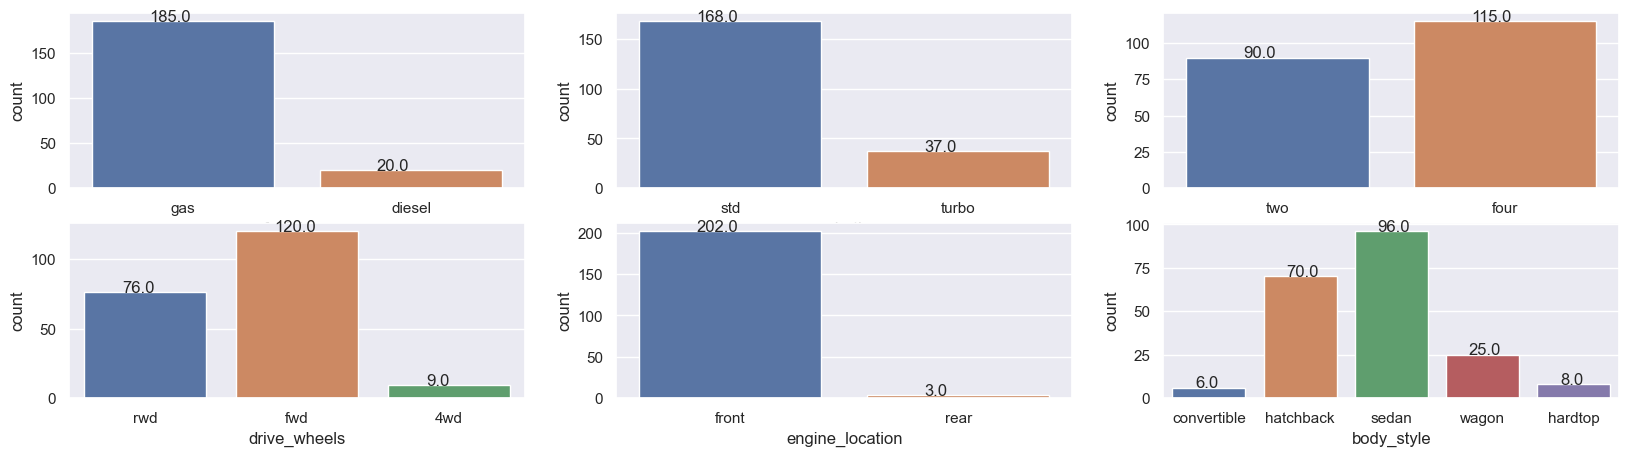

In [56]:
plt.subplots(figsize=(20,5))

plt.subplot(231)
ax=sns.countplot(data=categorical_features,x="fuel_type")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
         
plt.subplot(232)
ax=sns.countplot(data=categorical_features,x="aspiration")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(233)
ax=sns.countplot(data=categorical_features,x="num_of_doors")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(234)
ax=sns.countplot(data=categorical_features,x="drive_wheels")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 

plt.subplot(235)
ax=sns.countplot(data=categorical_features,x="engine_location")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(236)
ax=sns.countplot(data=categorical_features,x="body_style")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))            

In [57]:
categorical_features.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

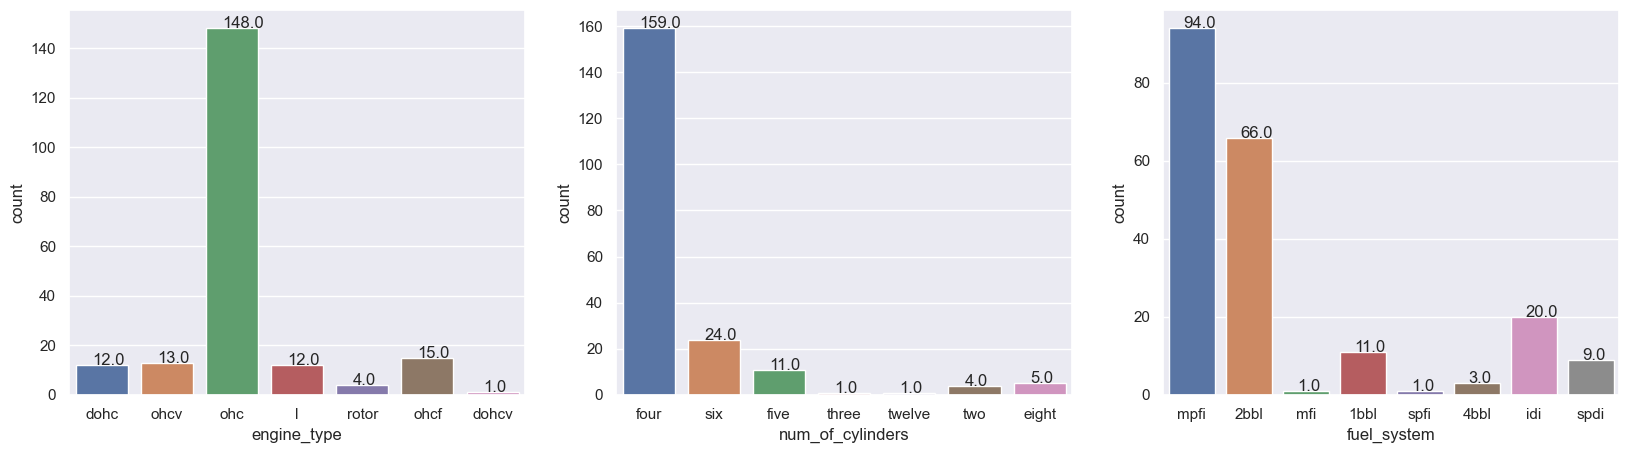

In [58]:
plt.subplots(figsize=(20,5))

plt.subplot(131)
ax=sns.countplot(data=categorical_features,x="engine_type")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
         
plt.subplot(132)
ax=sns.countplot(data=categorical_features,x="num_of_cylinders")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(133)
ax=sns.countplot(data=categorical_features,x="fuel_system")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

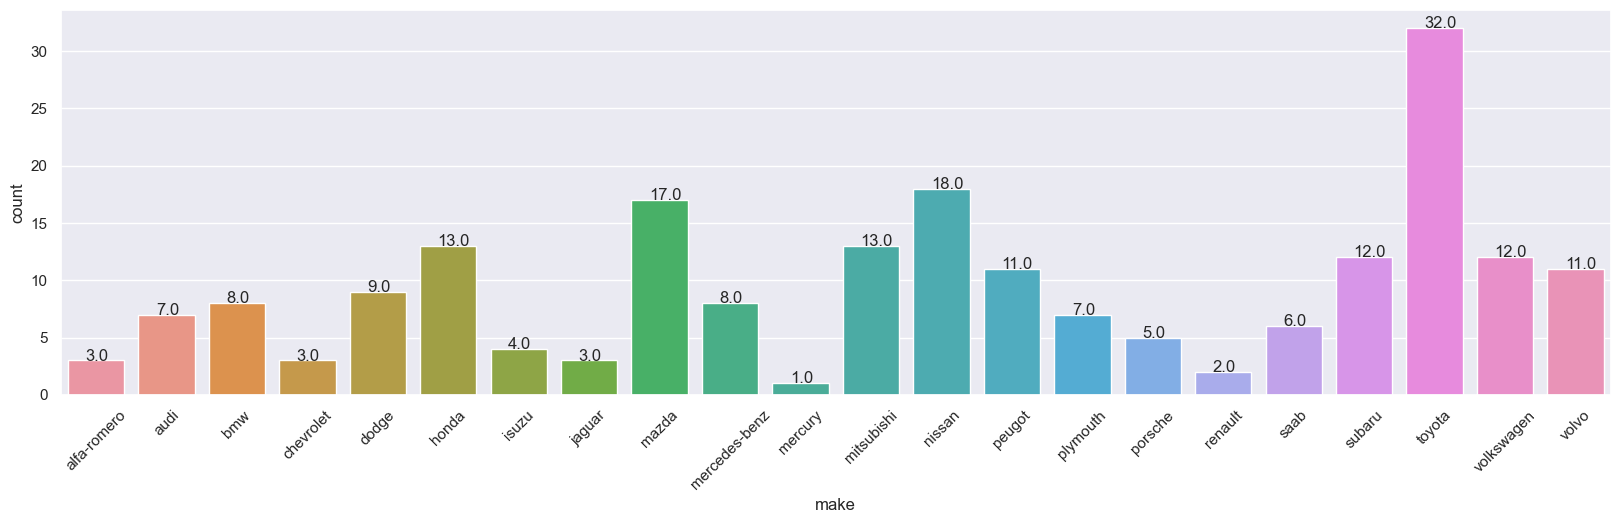

In [59]:
plt.subplots(figsize=(20,5))

ax=sns.countplot(data=categorical_features,x="make")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

*C. EDA Correlation*

In [60]:
import klib
klib.corr_interactive_plot(df,figsize=(10,5))

In [61]:
df.isna().sum().sum()

0

---

## *Data Modelling*

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import export_graphviz,DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
import graphviz
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
from lightgbm.sklearn import LGBMRegressor
import warnings                                  
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler

*Date preprocessing*

In [63]:
categories_encoder=LabelEncoder()

In [64]:
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])
        

In [65]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,102,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,102,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,137,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


*Define x and y*

In [99]:
x=df.drop(["price"],axis=1)
y=df["price"]

*Splitting data into training and testing subsets*

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (153, 25) and Y = (153,) : 
Test data shape of X = (52, 25) and Y = (52,) : 


*Data Scaling*

In [101]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [102]:

models = {
                "RandomForestRegressor": RandomForestRegressor(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "LinearRegression": LinearRegression(),
                "XGBRFRegressor": XGBRFRegressor(),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoostRegressor": AdaBoostRegressor(),
                "XGBRegressor":XGBRegressor(),
                "GradientBoostingRegressor":GradientBoostingRegressor()
                
            }
params={
                "Decision Tree": {
                    'criterion':['poisson', 'squared_error','friedman_mse','absolute_error'],
                    'splitter': ['best', 'random'],
                    "max_depth":[int(x) for x in np.linspace(start=10,stop=100,num=10)], 
                    "min_samples_split":[2,10,20,30],
                    "min_samples_leaf":[0.1,0.5,0.8],
                    'max_features': [1,2,3,4],
                },
                "Random Forest":{
                    "n_estimators":[90,100,110], 
                    "min_samples_split":[2,4,6],
                    "min_samples_leaf":[0.8,1],
                    "bootstrap":[True, False],                                                                                                    
                    "max_features":["sqrt","log2","auto"],                                     
                    #"max_depth":[int(x) for x in np.linspace(start=10,stop=50,num=10)],
                    "criterion":['poisson', 'squared_error','friedman_mse','absolute_error']
                },
                "Gradient Boosting":{
                    'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate': [0.0001,0.001,0.01],
                    'n_estimators': [90, 100, 110],
                    'subsample': [0.5,0.8],
                    'criterion':['squared_error', 'friedman_mse'],
                    'min_samples_split': [2, 4, 6],
                    'min_samples_leaf': [0.8, 1],
                    'max_depth':[2,3,4],
                    #'max_features': ['sqrt', 'log2', 'auto']
                    
                }, 

                "Linear Regression":{},
                "XGBRFRegressor":{
                    'learning_rate': [0.0001,0.001,0.01], 
                    "n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)], 
                    "max_depth":[int(x) for x in np.linspace(start=10,stop=100,num=10)], 
                    'min_child_weight': [int(x) for x in np.linspace(start=1,stop=10,num=1)],
                    'subsample': [0.1,0.5,0.8],
                    'gamma': [0.1,0.5,0.8],
                    'colsample_bytree': [0.1,0.5,0.8], 
                    'colsample_bynode': [0.1,0.5,0.8],
                    'reg_alpha': [0.1,0.5,0.8],
                    'reg_lambda': [0.1,0.5,0.8],
                },
                "CatBoosting Regressor":{
                    'learning_rate': [0.0001,0.001,0.01],
                    'depth': [2,4,5,8,10,12,14], 
                    'iterations': [int(x) for x in np.linspace(start=50,stop=200,num=10)], 
                    'l2_leaf_reg': [.1,.5,1,1.5,2,3,4,5,5.5],
                    'border_count': [32, 64, 128, 256],
                    'bagging_temperature': [0,0.1,0.5,0.8,1],
                    'random_strength':[0,0.1,0.5,0.8,1]
                },
                "AdaBoost Regressor":{
                    "n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)], 
                    'learning_rate': [0.0001,0.001,0.01,0.1],
                    'loss':['linear','square','exponential']
                    
                }
                
            }


In [104]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_prediction=model.predict(x_train)
    y_test_prediction=model.predict(x_test)

    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

    model_train_r2_score=r2_score(y_train,y_train_prediction)
    model_test_r2_score=r2_score(y_test,y_test_prediction)

    print(list(models.keys())[i])

    print("Model Performance for Train Data")
    print("mean_absolute_percentage_error : {:.4f}".format(model_train_mean_absolute_percentage_error))
    print("model_train_r2_score : {:.4f}".format(model_train_r2_score))

    print("------------------------------------------------------")

    print("Model Performance for test Data")
    print("model_test_mean_absolute_percentage_error : {:.4f}".format(model_test_mean_absolute_percentage_error))
    print("model_test_r2_score : {:.4f}".format(model_test_r2_score))

    print("="*35)
    print("\n")

RandomForestRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0419
model_train_r2_score : 0.9880
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.1310
model_test_r2_score : 0.9094


DecisionTreeRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0024
model_train_r2_score : 0.9997
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.1320
model_test_r2_score : 0.8942


LinearRegression
Model Performance for Train Data
mean_absolute_percentage_error : 0.1411
model_train_r2_score : 0.9231
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.2263
model_test_r2_score : 0.7912


XGBRFRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0520
model_train_r2_score : 0.9878
-----

In [106]:
report = {}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_prediction=model.predict(x_train)
    y_test_prediction=model.predict(x_test)

    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

    model_train_r2_score=r2_score(y_train,y_train_prediction)
    model_test_r2_score=r2_score(y_test,y_test_prediction)

    report[list(models.keys())[i]] = model_test_mean_absolute_percentage_error




In [108]:
def evaluate_models(X_train, y_train,X_test,y_test,models,param):
    report = {}
    for i in range(len(list(models))):
            model=list(models.values())[i]
            model.fit(x_train,y_train)

            y_train_prediction=model.predict(x_train)
            y_test_prediction=model.predict(x_test)

            model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
            model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

            model_train_r2_score=r2_score(y_train,y_train_prediction)
            model_test_r2_score=r2_score(y_test,y_test_prediction)

            report[list(models.keys())[i]] = model_test_mean_absolute_percentage_error
        

In [109]:
from tqdm import tqdm

In [110]:
model_report:dict=evaluate_models(x_train,y_train,x_test,y_test,models=models,param=params)

In [111]:
model_report

---

In [112]:
result_data=pd.DataFrame(model_report.values(),index=model_report.keys()).reset_index().rename(columns={"index":"Model",0:"mape"})
result_data.sort_values(by="mape")

AttributeError: 'NoneType' object has no attribute 'values'

In [113]:
ax=sns.barplot(data=result_data,x="mape",y="Model",order=result_data.sort_values(by="mape").Model)
ax.set_ylabel("Basic Models")
for label in ax.containers:
    ax.bar_label(label)

NameError: name 'result_data' is not defined

In [166]:
best_model_score = min(sorted(model_report.values()))
best_model_score

0.17262034967847592

In [167]:
best_model_name = list(model_report.keys())[
                list(model_report.values()).index(best_model_score)]
best_model_name

'AdaBoost Regressor'

In [168]:
best_model = models[best_model_name]
best_model

AdaBoostRegressor(learning_rate=0.001, n_estimators=100)

In [169]:
predicted=best_model.predict(xtest)

In [170]:
predicted[0:5]

array([ 7509.83823529, 10155.44      , 15217.88709677, 18911.72727273,
       30747.2       ])

In [171]:
r2_square = mean_absolute_percentage_error(ytest, predicted)
r2_square

0.17262034967847592

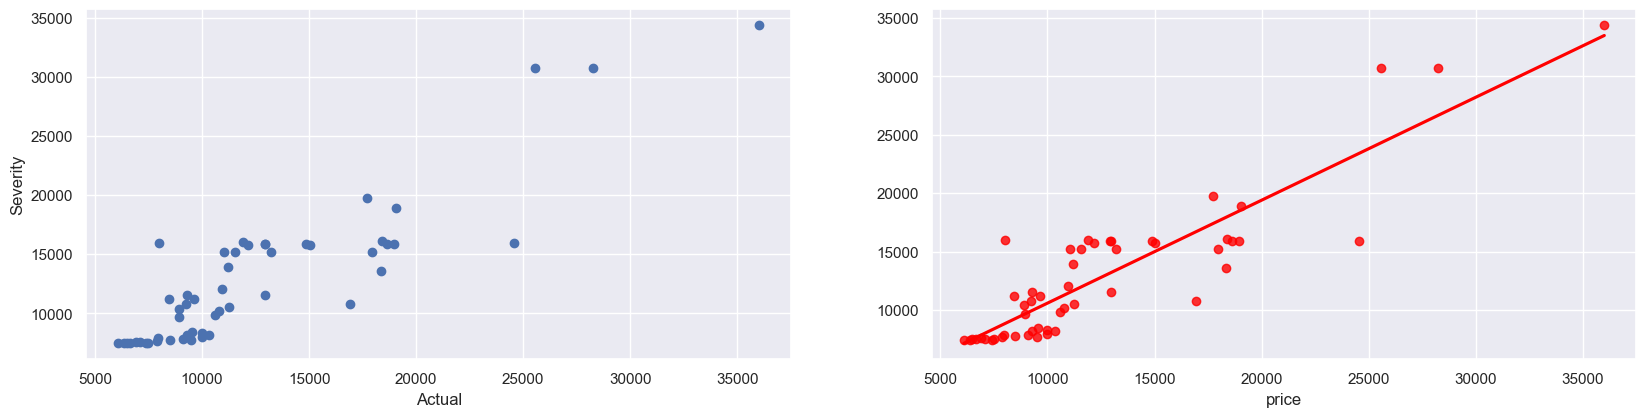

In [179]:
plt.subplot(221)
plt.scatter(ytest,predicted);

plt.xlabel('Actual');
plt.ylabel('Severity');

plt.subplot(222)
sns.regplot(x=ytest,y=predicted,ci=None,color ='red');